## Data Preprocessing

Duplicate rows were identified and removed from the dataset.  
Missing values were checked and handled using appropriate methods.  
Column names were standardized, and data types were corrected to ensure consistency.  
Fill missing values in numerical columns with median



In [1]:
import pandas as pd
import numpy as np

# Load the Excel file

file_path = "Dataset for People for their Blood Glucose Level with their Superficial body feature readings..xlsx"

# Read data (actual column names start from row 3)
df = pd.read_excel(file_path, header=2)

# Check shape and columns
df.shape, df.columns


((16969, 10),
 Index(['Age', 'Blood Glucose Level(BGL)', 'Diastolic Blood Pressure',
        'Systolic Blood Pressure', 'Heart Rate', 'Body Temperature', 'SPO2',
        'Sweating  (Y/N)', 'Shivering (Y/N)', 'Diabetic/NonDiabetic (D/N)'],
       dtype='object'))

In [2]:
# Clean column names for easy use
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("/", "")
)

# Rename columns to simpler names
df = df.rename(columns={
    "Blood_Glucose_LevelBGL": "BGL",
    "Diastolic_Blood_Pressure": "Diastolic_BP",
    "Systolic_Blood_Pressure": "Systolic_BP",
    "Body_Temperature": "Body_Temp",
    "Sweating__YN": "Sweating",
    "Shivering_YN": "Shivering",
    "DiabeticNonDiabetic_DN": "Diabetic"
})

df.columns


Index(['Age', 'BGL', 'Diastolic_BP', 'Systolic_BP', 'Heart_Rate', 'Body_Temp',
       'SPO2', 'Sweating', 'Shivering', 'Diabetic'],
      dtype='object')

In [10]:
# Check number of duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

Number of duplicate rows: 257


In [12]:
# Check missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())
df.dropna(inplace=True)

Missing values in each column:
Age             0
BGL             0
Diastolic_BP    0
Systolic_BP     0
Heart_Rate      0
Body_Temp       0
SPO2            0
Sweating        0
Shivering       0
Diabetic        0
dtype: int64


In [6]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Fill missing values in numerical columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values in categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Recheck missing values
df.isnull().sum()


,0
Age,0
BGL,0
Diastolic_BP,0
Systolic_BP,0
Heart_Rate,0
Body_Temp,0
SPO2,0
Sweating,0
Shivering,0
Diabetic,0


In [13]:
# Check data types of columns
df.dtypes


,0
Age,int64
BGL,int64
Diastolic_BP,int64
Systolic_BP,int64
Heart_Rate,int64
Body_Temp,float64
SPO2,int64
Sweating,int64
Shivering,int64
Diabetic,object


In [14]:
# Shape of dataset after preprocessing
print("Shape after preprocessing:", df.shape)


Shape after preprocessing: (16712, 10)


## Exploratory Data Analysis (EDA)

Exploratory data analysis was performed to understand the distribution of features, the target variable, relationships between variables, and the presence of outliers.


In [15]:
# Statistical summary of numerical features
df.describe()


,Age,BGL,Diastolic_BP,Systolic_BP,Heart_Rate,Body_Temp,SPO2,Sweating,Shivering
count,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000
mean,31.175084,95.982887,77.096757,118.189086,91.604416,97.355974,97.379548,0.123564,0.147798
std,25.611310,43.267765,7.231391,7.727460,10.447328,0.813369,0.852033,0.329093,0.354910
min,9.000000,50.000000,60.000000,95.000000,78.000000,96.000132,93.000000,0.000000,0.000000
25%,9.000000,68.000000,71.000000,113.000000,84.000000,96.674466,97.000000,0.000000,0.000000
50%,14.000000,84.000000,76.000000,119.000000,89.000000,97.324359,98.000000,0.000000,0.000000
75%,55.000000,108.000000,83.000000,124.000000,95.000000,97.949146,98.000000,0.000000,0.000000
max,77.000000,250.000000,98.000000,145.000000,130.000000,98.999792,99.000000,1.000000,1.000000


In [17]:
# Create glucose level categories based on BGL
def glucose_category(bgl):
    if bgl < 70:
        return "Low"
    elif 70 <= bgl <= 140:
        return "Normal"
    else:
        return "High"

df["Glucose_Class"] = df["BGL"].apply(glucose_category)

# Check class distribution
print(df["Glucose_Class"].value_counts())


Glucose_Class
Normal    10538
Low        5147
High       1027
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

Basic exploratory analysis was performed using summary statistics and visualizations to understand feature distributions, class balance, correlations, and outliers in the dataset.


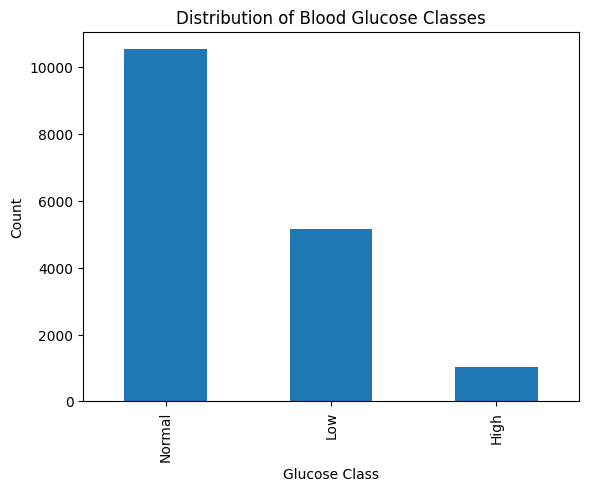

In [24]:
# Plot glucose class distribution
df["Glucose_Class"].value_counts().plot(kind="bar")
plt.xlabel("Glucose Class")
plt.ylabel("Count")
plt.title("Distribution of Blood Glucose Classes")
plt.show()


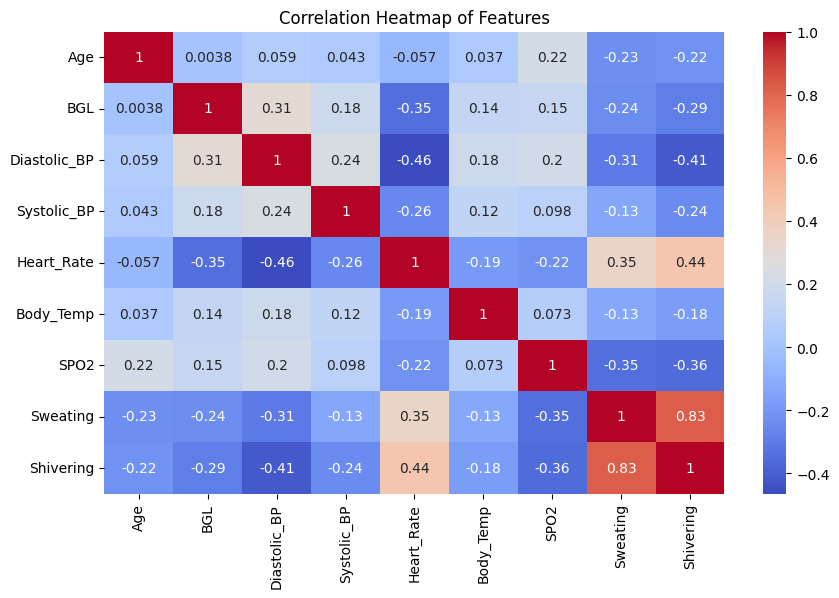

In [19]:
import seaborn as sns

# Correlation heatmap
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


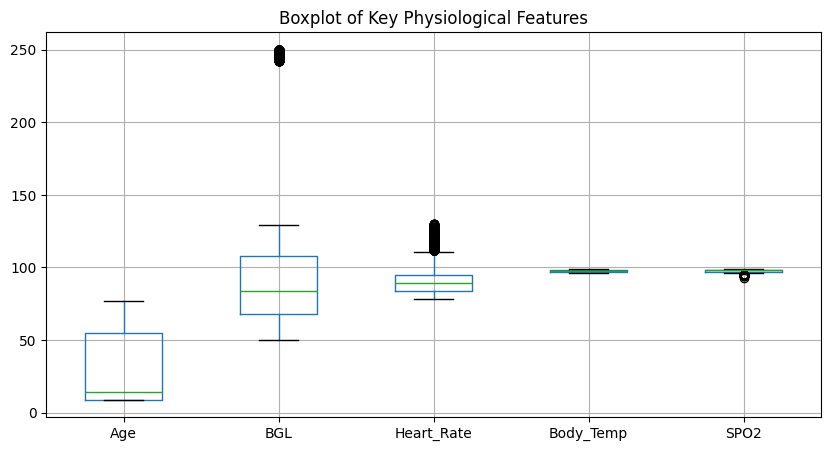

In [20]:
# Boxplot to detect outliers
df[["Age", "BGL", "Heart_Rate", "Body_Temp", "SPO2"]].boxplot(figsize=(10,5))
plt.title("Boxplot of Key Physiological Features")
plt.show()


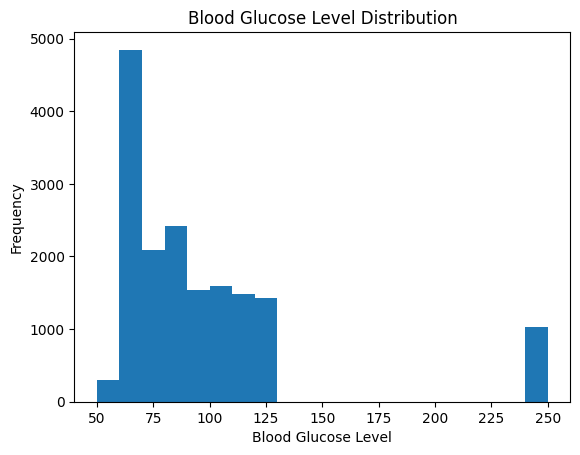

In [21]:
# Blood Glucose Level distribution
plt.hist(df["BGL"], bins=20)
plt.xlabel("Blood Glucose Level")
plt.ylabel("Frequency")
plt.title("Blood Glucose Level Distribution")
plt.show()


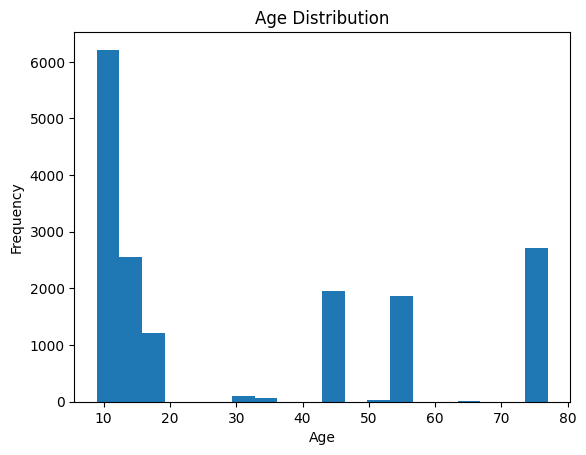

In [22]:
# Age distribution
plt.hist(df["Age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()
